##Calibrations Stats
####(How to Perform Pre-Ship Test?)

In order to determine how chroma pro's should be tested pre-shipment, we will analyze the calibration data we have available in our new B2 system

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import time
import os
import sys
sys.path.append('/Users/Jeff/ownCloud/Bitbucket/Python/pythonChroma')

import numpy as np
import seaborn as sns
sns.set_style('white')

import pandas as pd

import mpld3

mpld3.enable_notebook()

from pythonChroma import colorCalc, colorPlot
import cPickle as pickle

In [46]:
with open('chroma_pro_cal_sets.pck', 'rb') as pick_file:
    scan_sets = pickle.load(pick_file)
 
print('Total Chroma Pro Cals Being Evaluated: %d'%len(scan_sets))
print('All Labs are Adjusted %s illuminant'%scan_sets[0].illuminant)



Total Chroma Pro Cals Being Evaluated: 507
All Labs are Adjusted d50 illuminant


##Generate Plots

* Each plot shows the delta E distribution for the MB24 plus WP and BP of all Chroma Pros in B2 that are not flagged as obsolete.

* The title of the figure shows the avg. Lab values for that specific color.  This should be used as the standard for the out-the-door chroma tests.

* Included in each figure is the standard deviation for unit-unit deltaE on that color.  It is my opinion that we should flag units which have a deltaE of greater than two standard deviations from the mean Lab.


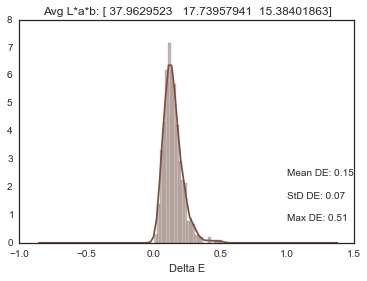

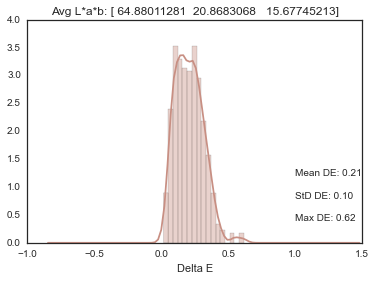

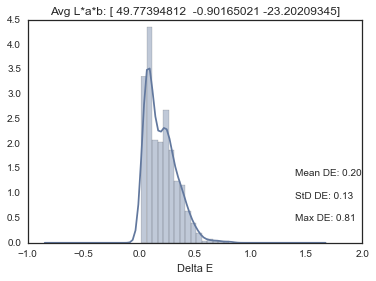

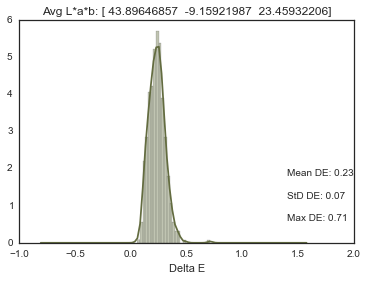

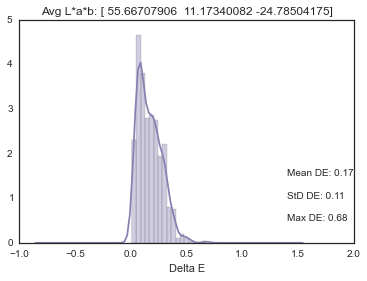

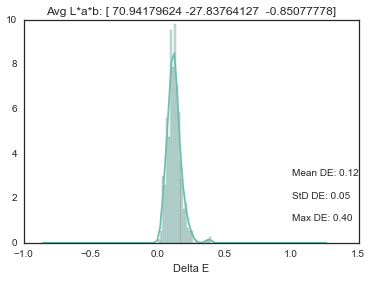

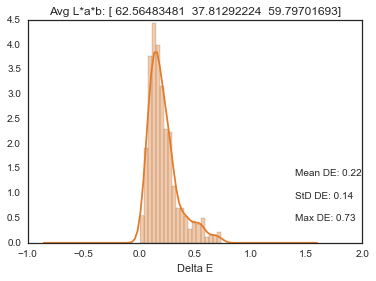

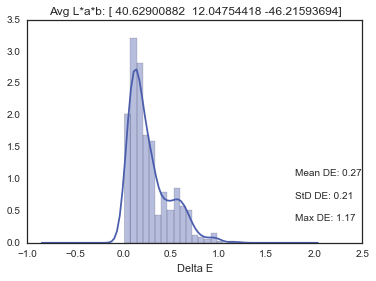

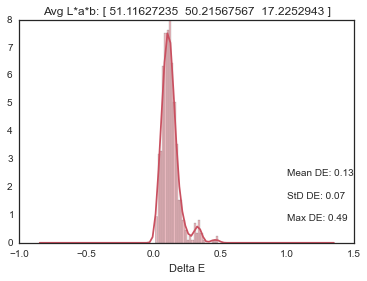

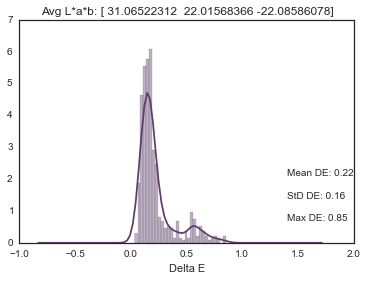

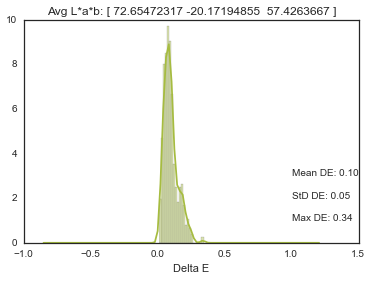

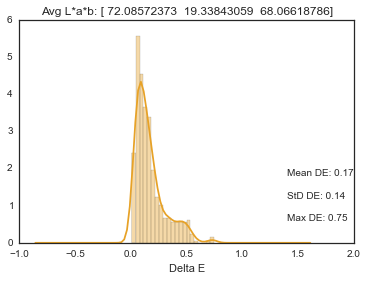

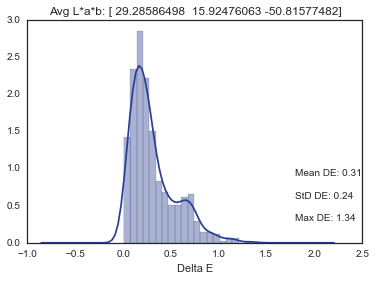

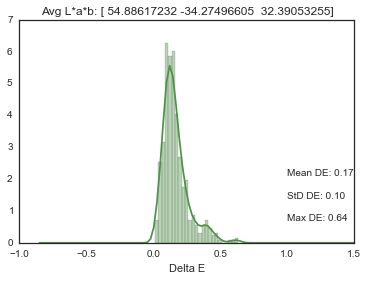

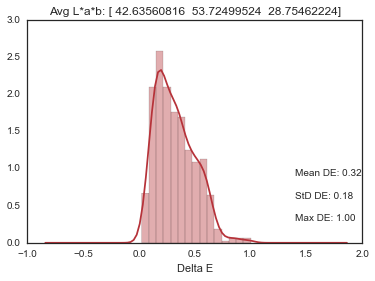

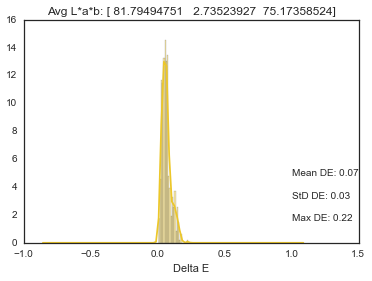

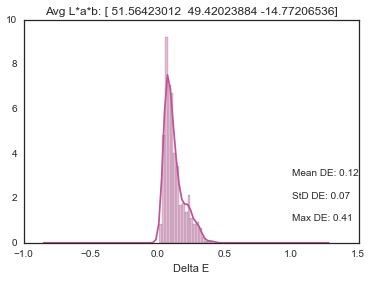

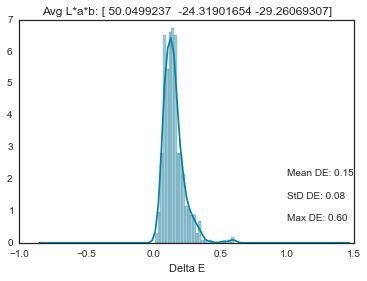

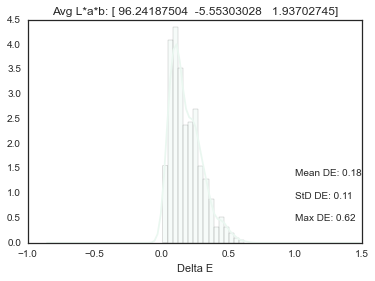

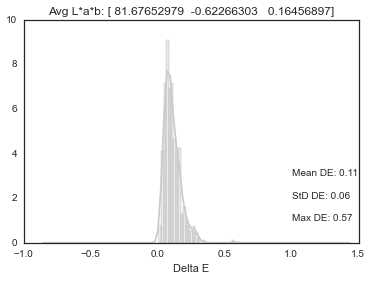

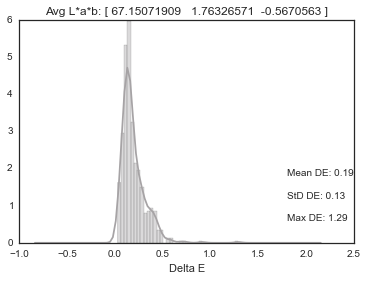

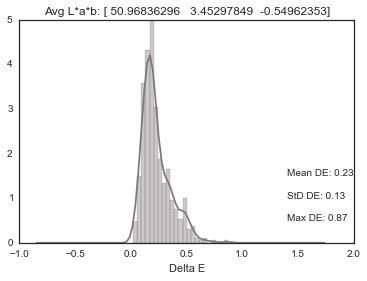

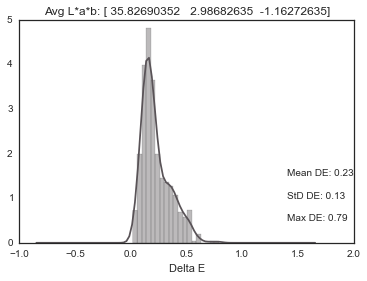

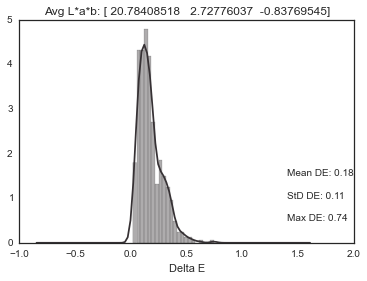

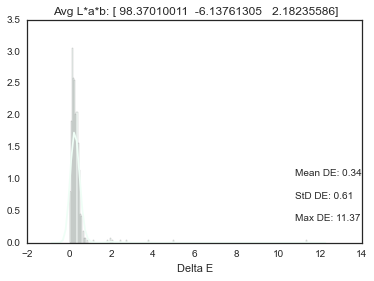

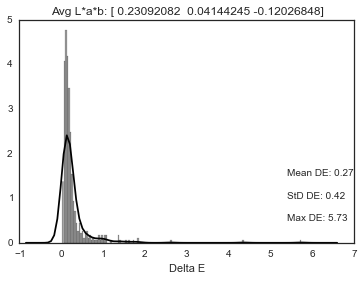

In [47]:
per_color = map(lambda x: colorCalc.LabList(scan_sets[0].illuminant, x), zip(*scan_sets))

des = []
means = []
stds = []
for color in per_color:
    des.append(colorCalc.deltaE(color, colorCalc.LabList(color.illuminant, [np.mean(color.np_array, axis=0)]*len(color))).flatten())
    des[-1] = des[-1][des[-1] > 0.0]
    means.append(np.mean(des[-1]))
    stds.append(np.std(des[-1]))
    
    rgb_color = tuple(color.getSRGB()[0])
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.set_title('Avg L*a*b: %s'%(str(np.mean(color.np_array, axis=0))))
    ax.set_xlabel('Delta E')
    ax.text(.8, .3, 'Mean DE: %0.2f'%(means[-1]),
            transform=ax.transAxes, weight='ultralight')
    ax.text(.8, .2, 'StD DE: %0.2f'%(stds[-1]),
            transform=ax.transAxes, weight='ultralight')
    ax.text(.8, .1, 'Max DE: %0.2f'%(np.max(des[-1])),
            transform=ax.transAxes, weight='ultralight')
    sns.distplot(des[-1], color=rgb_color, ax=ax)
    


##Which Colors to Scan for Pre-Ship Test
* Below is a ranked list of the color indeces by the sum of the mean and std of deltaE.
* WP and BP rank highest probably because they are outside of the scope of the ANN
* I would recommend scanning at least the next 5 colors in the list pre-shipment.
    * If it is determined feasible to scan more than 5 colors, they should be chosen based on this list as well.

In [48]:
df = pd.DataFrame(np.asarray([means, stds]).T, columns=['means', 'std'])

df = pd.DataFrame((df['means']+df['std']).argsort()[::-1], columns=['ranked mean + std indeces'])

print(df)


    ranked mean + std indeces
25                         24
24                         25
23                         12
22                         14
21                          7
20                          9
19                         21
18                         22
17                          6
16                          2
15                         20
14                          1
13                         11
12                          3
11                         18
10                         23
9                           4
8                          13
7                          17
6                           0
5                           8
4                          16
3                           5
2                          19
1                          10
0                          15


##Test Procedure
* After the desired colors are selected from the list above, add the avg. Lab values from the corresponding figure as standards in the inspect app with a deltaE tolerance of 2 standard deviations as shown in the figure.
    * The inspect app must be configured to compared using **ADJUSTED** values matching the illuminant shown at the beginning of the analysis.
* Scan the appropriate standards for each chroma before it is shipped.  If a inspect shows a failure, do not ship chroma until it can be evaluated with/by engineering.